# Лабораторная работа №4.3.1

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from  sklearn import linear_model

## Дифракция Френеля (на 1 щели)
### Зависимость расстояния между щелью и экраном от количества темных линий

#### Ширина щели D = 0.1 мм

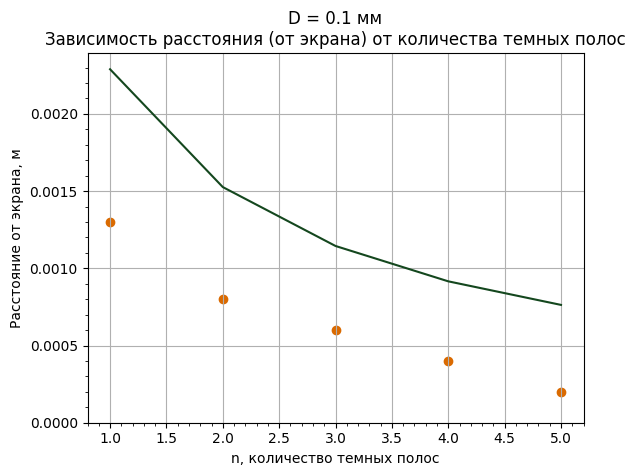

In [3]:

D = 0.1 * 10**-3
n = np.array([1, 2, 3, 4, 5])
a_exp = np.array([1.3, 0.8, 0.6, 0.4, 0.2])*10**-3 # расстояние между экраном и щелью
lamb = 546.1 * 10**-9
a_teor = (D/2)**2/((n+1)*lamb) #плохо совпадают, видимо, плохо делали лабу (см 3 комментария внизу)

plt.scatter(n, a_exp, c='#DA6A00')
plt.plot(n, a_teor, c='#14471E')
plt.minorticks_on()
plt.ylim(0)
plt.title("D = 0.1 мм\nЗависимость расстояния (от экрана) от количества темных полос")
plt.ylabel("Расстояние от экрана, м")
plt.xlabel("n, количество темных полос")
plt.grid(visible=True)
plt.show()

# print("Полное число открытых зон Френеля: ", D**2/(4*lamb*a_exp)) # из лабника, по экспериментальным данным
# print("По формуле в лабнике m = n + 1: ", n+1) #  n -- кол-во темных полос
# print("Приблежение, которое лучше описывает : ", (n+1)*2-1) # но не по подходит из-за не чередования четных/нечетных значений

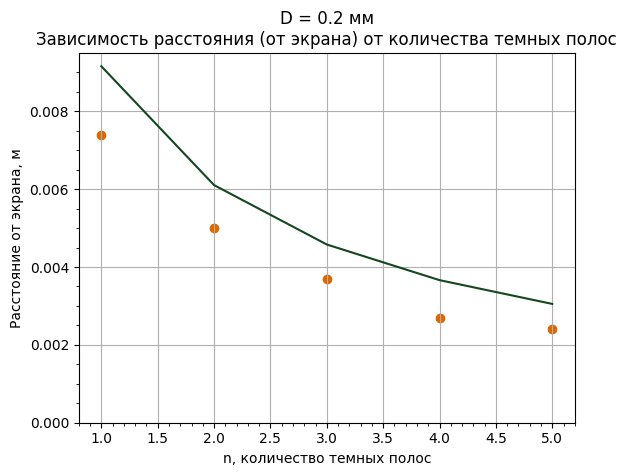

In [4]:

D = 0.2 * 10**-3
n = np.array([1, 2, 3, 4, 5])
a_exp = np.array([7.4, 5, 3.7, 2.7, 2.4])*10**-3 # расстояние между экраном и щелью
lamb = 546.1 * 10**-9
a_teor = (D/2)**2/((n+1)*lamb) #приемлемо совпадают, видимо, неплохо делали лабу (см 2 комментария внизу)

plt.scatter(n, a_exp, c='#DA6A00')
plt.plot(n, a_teor, c='#14471E')
plt.minorticks_on()
plt.ylim(0)
plt.title("D = 0.2 мм\nЗависимость расстояния (от экрана) от количества темных полос")
plt.ylabel("Расстояние от экрана, м")
plt.xlabel("n, количество темных полос")
plt.grid(visible=True)
plt.show()

# print("Полное число открытых зон Френеля: ", D**2/(4*lamb*a_exp)) # из лабника, по экспериментальным данным
# print("По формуле в лабнике m = n + 1: ", n+1) #  n -- кол-во темных полос

### Сравнение действительной ширины щели и посчитанной (по размеру зон Френеля)
#### D = 0.1 мм

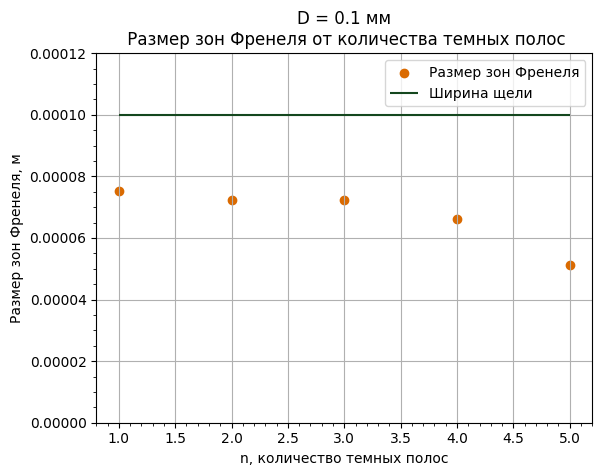

In [5]:
D = 0.1 * 10**-3
n = np.array([1, 2, 3, 4, 5])
a_exp = np.array([1.3, 0.8, 0.6, 0.4, 0.2])*10**-3  # размер зон френеля
lamb = 546.1 * 10**-9
D_exp = 2*(a_exp*(n+1)* lamb)**0.5

plt.scatter(n, D_exp, c='#DA6A00', label="Размер зон Френеля")
plt.hlines(D, 1, 5, colors='#14471E', label="Ширина щели")
plt.minorticks_on()
plt.ylim(0, 0.00012)
plt.title("D = 0.1 мм\n Размер зон Френеля от количества темных полос")
plt.ylabel("Размер зон Френеля, м")
plt.xlabel("n, количество темных полос")
plt.legend()
plt.grid(visible=True)
plt.show()

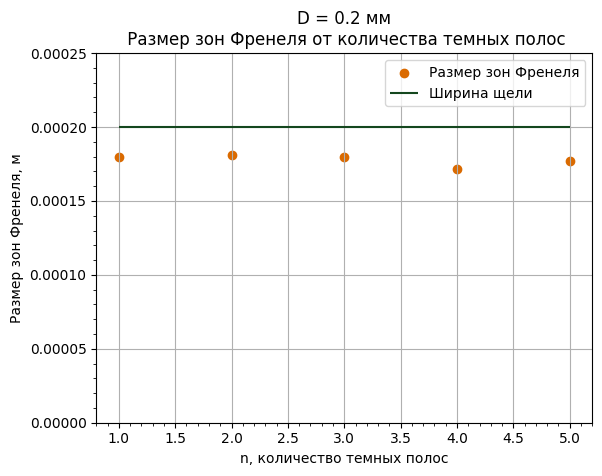

In [ ]:
D = 0.2 * 10**-3
n = np.array([1, 2, 3, 4, 5])
a_exp = np.array([7.4, 5, 3.7, 2.7, 2.4])*10**-3 # расстояние между экраном и щелью
lamb = 546.1 * 10**-9
D_exp = 2*(a_exp*(n+1)* lamb)**0.5

plt.scatter(n, D_exp, c='#DA6A00', label="Размер зон Френеля")
plt.hlines(D, 1, 5, colors='#14471E', label="Ширина щели")
plt.minorticks_on()
plt.ylim(0, 0.00025)
plt.title("D = 0.2 мм\n Размер зон Френеля от количества темных полос")
plt.ylabel("Размер зон Френеля, м")
plt.xlabel("n, количество темных полос")
plt.legend()
plt.grid(visible=True)
plt.show()

## Дифракция Фраунгофера на одной щели
#### D = 0.8 мм

delta_x =  0.00011071428571428589 м =  0.11071428571428589 мм


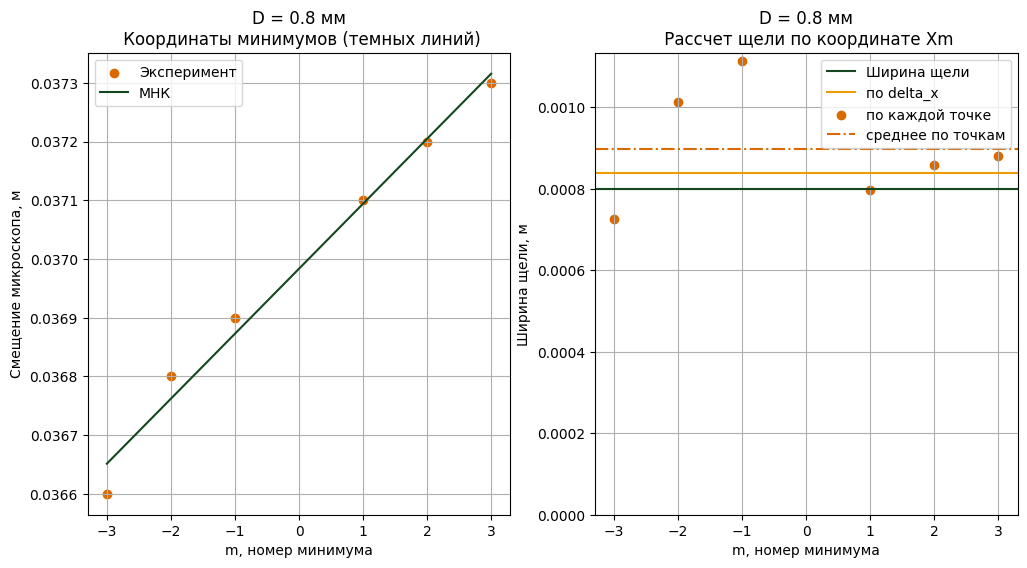

In [ ]:
D = 0.8 * 10**-3 
f2 = 0.17 # фокусное расстояние линзы перед микроскопом 
lamb = 546.1 * 10**-9
x = np.array([36.6, 36.8, 36.9, 37.1, 37.2, 37.3]) * 10**-3
m = np.array([-3, -2, -1, 1, 2, 3])

OLS = linear_model.LinearRegression()
OLS.fit(X = m.reshape(-1, 1), y=x)
delta_x = OLS.coef_[-1]
print("delta_x = ", delta_x, "м = ", delta_x*10**3, "мм")

figure, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 6])

ax1.scatter(m, x, c='#DA6A00', label="Эксперимент")
ax1.plot(m, OLS.predict(m.reshape(-1, 1)), label="МНК", c='#14471E')
ax1.set_xlabel("m, номер минимума")
ax1.set_ylabel("Смещение микроскопа, м")
ax1.grid(visible=True)
ax1.legend()
ax1.set_title("D = 0.8 мм\n Координаты минимумов (темных линий)")


ax2.axhline(f2*lamb/delta_x, label="по delta_x", c='#EE9B01')
ax2.scatter(m, f2*lamb*m/(x-x.mean()), label="по каждой точке", c='#DA6A00')
ax2.axhline((f2*lamb*m/(x-x.mean())).mean(), linestyle='-.', label="среднее по точкам", c='#DA6A00') # не требовалась
ax2.axhline(D, label="Ширина щели", c='#14471E')


ax2.set_xlabel("m, номер минимума")
ax2.set_ylabel("Ширина щели, м")
ax2.grid(visible=True)
ax2.legend()
ax2.set_ylim(0)
ax2.set_title("D = 0.8 мм\n Рассчет щели по координате Xm")

plt.show()

delta_x =  0.00021071428571428603 м =  0.21071428571428602 мм


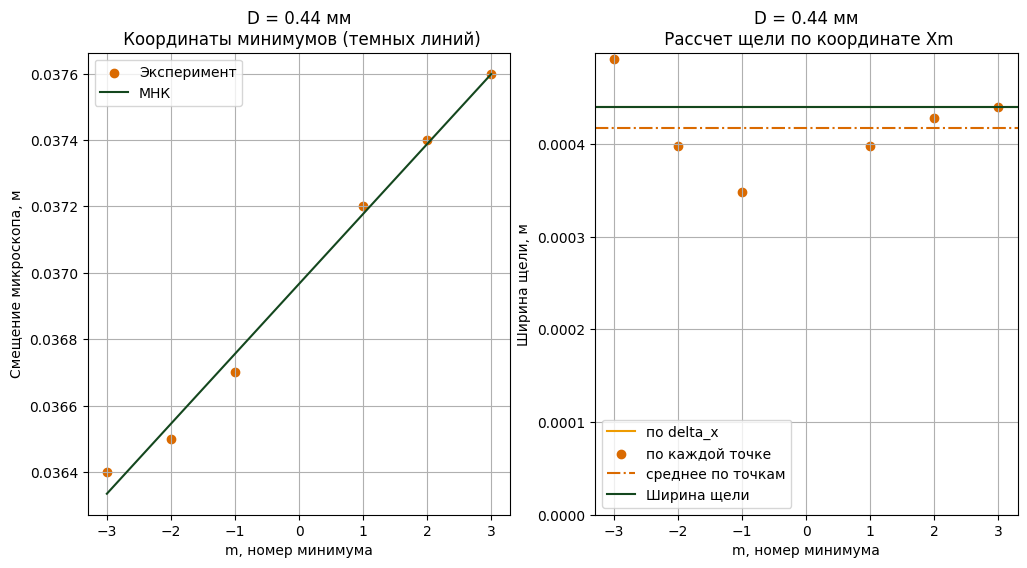

In [ ]:
D = 0.44 * 10**-3
f2 = 0.17 # фокусное расстояние линзы перед микроскопом 
lamb = 546.1 * 10**-9
x = np.array([36.4, 36.5, 36.7, 37.2, 37.4, 37.6]) * 10**-3
m = np.array([-3, -2, -1, 1, 2, 3])

OLS = linear_model.LinearRegression()
OLS.fit(X = m.reshape(-1, 1), y=x)
delta_x = OLS.coef_[-1]
print("delta_x = ", delta_x, "м = ", delta_x*10**3, "мм")



figure, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 6])


ax1.scatter(m, x, c='#DA6A00', label="Эксперимент")
ax1.plot(m, OLS.predict(m.reshape(-1, 1)), label="МНК", c='#14471E')

ax1.set_xlabel("m, номер минимума")
ax1.set_ylabel("Смещение микроскопа, м")
ax1.grid(visible=True)
ax1.legend()
ax1.set_title("D = 0.44 мм\n Координаты минимумов (темных линий)")


ax2.axhline(f2*lamb/delta_x, label="по delta_x", c='#EE9B01')
ax2.scatter(m, f2*lamb*m/(x-x.mean()), label="по каждой точке", c='#DA6A00')
ax2.axhline((f2*lamb*m/(x-x.mean())).mean(), linestyle='-.', label="среднее по точкам", c='#DA6A00') # не требовалась
ax2.axhline(D, label="Ширина щели", c='#14471E')

ax2.set_xlabel("m, номер минимума")
ax2.set_ylabel("Ширина щели, м")
ax2.grid(visible=True)
ax2.legend()
ax2.set_ylim(0)
ax2.set_title("D = 0.44 мм\n Рассчет щели по координате Xm")

plt.show()

## Дифракция Фраунгофера на двух щелях

In [ ]:
d = 1.5 * 10**-3
D = 0.5 * 10**-3
n = 7
lamb = 546.1 * 10**-9
f2 = 0.17 # фокусное расстояние линзы перед микроскопом 
x_left, x_right = 35.9, 36.6
delta_x_exp = (x_right - x_left)/n*10**-3
x_left *= 10**-3
x_right *= 10**-3

print("красивая дельта x = ", delta_x_exp, "м = ", delta_x_exp*10**3, "мм")
d_exp = f2*lamb/delta_x_exp
print("d экспериментальная = ", d_exp, "м |", " d фактическая = ", d, "м")
n_teor = 2*d/D # из лабника
print("n фактическая = ", n, " |", " n теоретическая = ",n_teor) # ошибка, вероятно
# связана с неправильным подсчетом светлых линий (взяли на 1 больше с каждой стороны)
# или с измерениями d и D (измеряли с помощью линейки с ценой деления 1мм :) )



# хз что с этим делать
f1 = f2 # не записали -- хз чему равно
b = 0.44 * 10**-3 # не записали -- хз чему равно
b_exp = f1*lamb/d

b_exp


красивая дельта x =  0.00010000000000000041 м =  0.10000000000000041 мм
d экспериментальная =  0.0009283699999999963 м |  d фактическая =  0.0015 м
n фактическая =  7  |  n теоретическая =  6.0


6.189133333333334e-05

## Ответы на контрольные вопросы
![вопросы](voprosy.jpg)